# ECSE415 - Intro to Computer Vision
## Assignment 1 - Image Filtering
### Alexander Harris - 260688155

# 3. Template Matching

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Import images
scene_color = cv2.imread('data/where_is_waldo.jpg')
scene = cv2.imread('data/where_is_waldo.jpg', cv2.IMREAD_GRAYSCALE)
template_clean = cv2.imread('data/template1.png', cv2.IMREAD_GRAYSCALE)
template_noisy = cv2.imread('data/template2.png', cv2.IMREAD_GRAYSCALE)

In [2]:
# Clean template match
box_w, box_h = template_clean.shape[::-1]

# Compute SSD map
result_clean = cv2.matchTemplate(scene, template_clean, cv2.TM_SQDIFF)

# Find minimum
min_val, max_val, min_idx, max_idx = cv2.minMaxLoc(result_clean)
corner = (min_idx[0] + box_w, min_idx[1] + box_h)

# Draw bounding box around detected match
scene_match_clean = scene_color.copy()
scene_match_clean = cv2.rectangle(scene_match_clean, min_idx, corner, (255,255,255), 2)

In [3]:
# Noisy template match
box_w, box_h = template_noisy.shape[::-1]

# Compute SSD map
result_noisy = cv2.matchTemplate(scene, template_noisy, cv2.TM_SQDIFF)

# Find minimum
min_val, max_val, min_idx, max_idx = cv2.minMaxLoc(result_noisy)
corner = (min_idx[0] + box_w, min_idx[1] + box_h)

# Draw bounding box around detected match
scene_match_noisy = scene_color.copy()
scene_match_noisy = cv2.rectangle(scene_match_noisy, min_idx, corner, (255,255,255), 2)

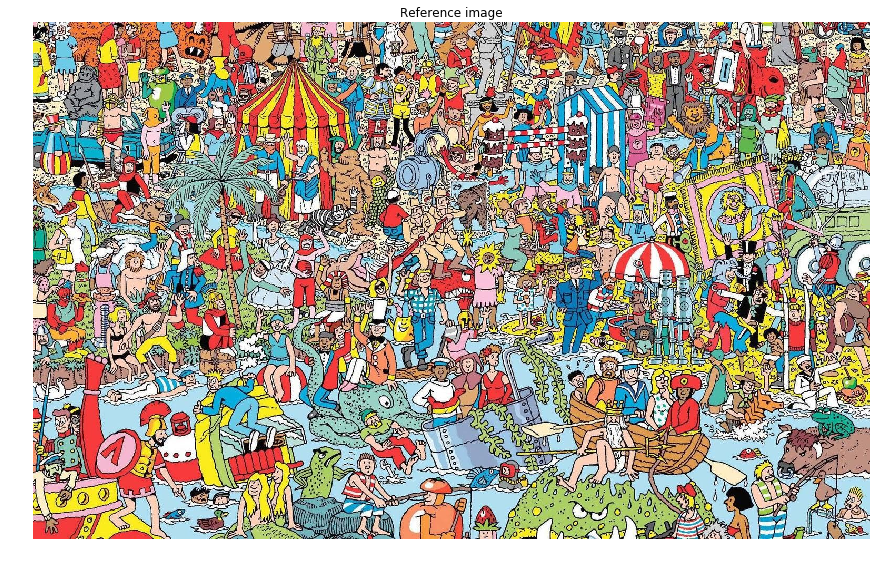

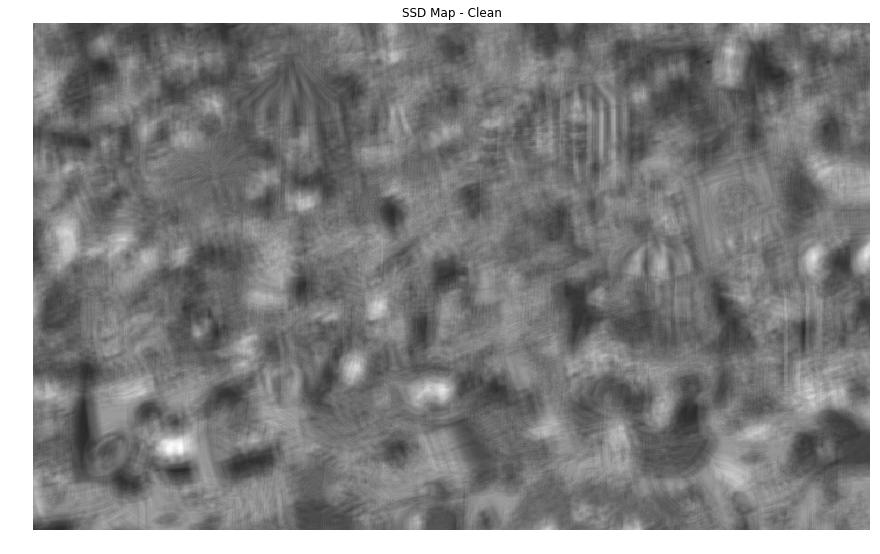

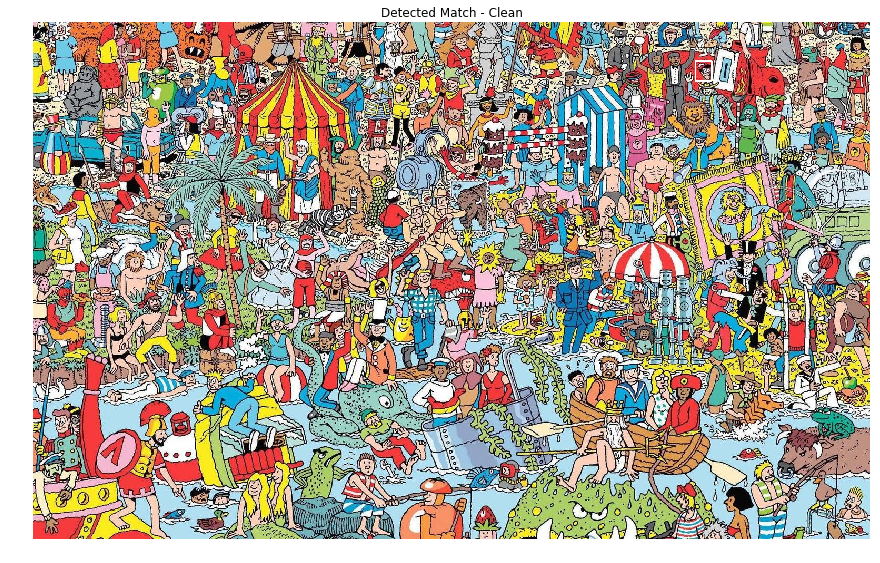

In [4]:
# Display images
plt.figure(figsize=(15, 15))
plt.imshow(cv2.cvtColor(scene_color, cv2.COLOR_BGR2RGB))
plt.title('Reference image'), plt.axis('off')
plt.show()

# Clean template results
plt.figure(figsize=(15, 15))
plt.imshow(result_clean, cmap="gray")
plt.title('SSD Map - Clean'), plt.axis('off')
plt.show()
plt.figure(figsize=(15, 15))
plt.imshow(cv2.cvtColor(scene_match_clean, cv2.COLOR_BGR2RGB))
plt.title('Detected Match - Clean'), plt.axis('off')
plt.show()

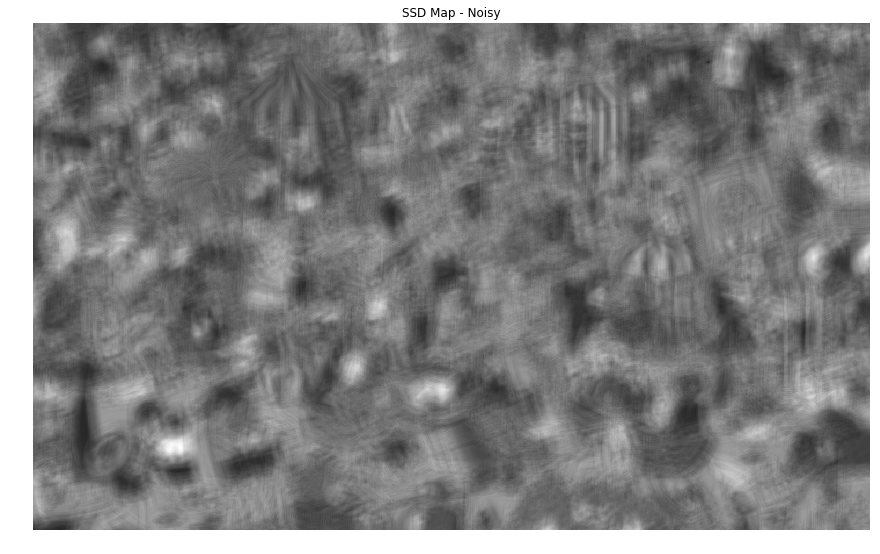

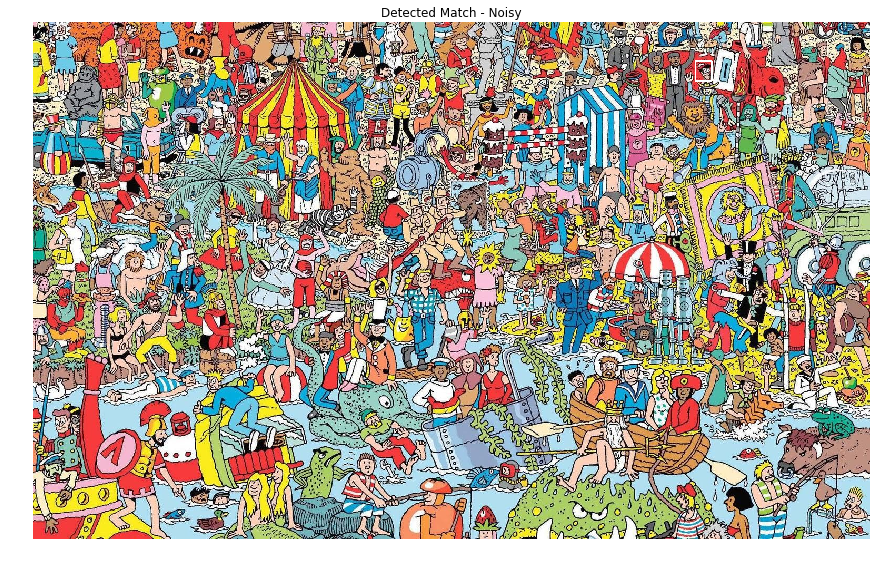

In [5]:
# Noisy template results
plt.figure(figsize=(15, 15))
plt.imshow(result_noisy, cmap="gray")
plt.title('SSD Map - Noisy'), plt.axis('off')
plt.show()
plt.figure(figsize=(15, 15))
plt.imshow(cv2.cvtColor(scene_match_noisy, cv2.COLOR_BGR2RGB))
plt.title('Detected Match - Noisy'), plt.axis('off')
plt.show()